---

#  Mplfinance Used To Plot Ichimoku Cloud

---

---

### mplfinance 'yahoo' styles was used to customize plot:
- Type of Plot Use `candle`
- Ichimoku Cloud Build With Five Types Lines Named Tenkan-sen, Kijun-sen, Senkou_Span_A, Senkou_Span_B, Chikou_Span
- Background, Grid, and Figure Colors
- Grid style
- Y-Axis On The Right or Left
- Matplotlib Defaults
- Fill Between Senkou_Span_A, Senkou_Span_B,
- Alpha
- Color
#### The simplest way to do this is to choose one of the `add_plot` that come packaged with `mplfinance`
#### but, as we see below, it is also possible to customize your own `mplfinance styles`.
#### Also Other Plot Type Can Be Used

---

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import mplfinance as mpf
import pandas as pd

### Read in daily data for the S&P 500 from November of 2019 

In [3]:
idf = pd.read_csv('../data/yahoofinance-INTC-19950101-20040412.csv',index_col=0,parse_dates=True).tail(200)

df = idf.copy()
df.index.name = 'Date'
df.shape
df.head(2)
df.tail(2)

(200, 6)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-06-25,20.530001,20.83,19.99,20.040001,13.693501,61250600
2003-06-26,20.299999,20.76,20.15,20.629999,14.096654,52904900


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-04-07,28.08,28.129999,27.480000,27.620001,18.923342,72680200
2004-04-08,28.08,28.139999,27.200001,27.370001,18.752058,71791400


---

- Here We Use the `rolling max` of `High` and `rolling min` of `Low` To Calculate Tenkan-sen line with `window` = 9.
- Here We Use the `rolling max` of `High` and `rolling min` of `Low` To Calculate Kijun-sen line with `window` = 26.
- To Obtain Senkou_Span_A Line We Used Tenkan-sen `+` Kijun-sen `divided` by 2 
- Here We Use The `rolling max` of `High` and `rolling min` of `Low` To Calculate Senkou_Span_B with  `window` = 52
- Here We Use The `shift` for -26
- **Here is Following Calculation:**

---

In [4]:
# Formula To Obtain Ichimoku Cloud 
df['Tenkan-sen'] = (df['High'].rolling(window=9).max() + df['Low'].rolling(window=9).min()) / 2
df['Kijun-sen'] = (df['High'].rolling(window=26).max() + df['Low'].rolling(window=26).min()) / 2 
df['Senkou_Span_A'] = (df['Tenkan-sen'] + df['Kijun-sen']) / 2 
df['Senkou_Span_B'] = (df['High'].rolling(window=52).max() + df['Low'].rolling(window=52).min()) / 2 
df['Chikou_Span'] = df['Close'].shift(periods=-26) 

a = df[['Tenkan-sen']]
b = df[['Kijun-sen']]
c = df[['Chikou_Span']]
d = df[['Senkou_Span_A']]
e = df[['Senkou_Span_B']]

---

Let's say we want to plot the Ichimoku Cloud along with the basic OHLCV plot.  

We Use `make_addplot()` to create the addplot dict, and pass that into the plot() function:

We Use `Color` To Define Line Colors

We Use `alpha` To Define Depth Line Color

In [5]:
ic = [
    mpf.make_addplot(a,color='#fcc905',alpha=0.5,),
    mpf.make_addplot(b,color='#F83C78',alpha=0.5,),
    mpf.make_addplot(c,color='#8D8D16',alpha=0.8,),
    mpf.make_addplot(d,color='#006B3D',alpha=0.8,),
    mpf.make_addplot(e,color='#D3212C',alpha=0.8,),
]

Use a dict to specify other attributes (kwargs) for `fill_between`:
<br>
To demonstrate use of fill_between the `where` kwarg to used
<br>
`where = df['Senkou_Span_A'] < df['Senkou_Span_B']`

In [6]:
ichimoko_fill_up = dict(y1 = df['Senkou_Span_A'].values, y2 = df['Senkou_Span_B'].values, where = df['Senkou_Span_A'] >= df['Senkou_Span_B'], alpha = 0.5, color = '#a6f7a6')
ichimoko_fill_down = dict(y1 = df['Senkou_Span_A'].values, y2 = df['Senkou_Span_B'].values, where = df['Senkou_Span_A'] < df['Senkou_Span_B'], alpha = 0.5, color = '#FC8EAC')

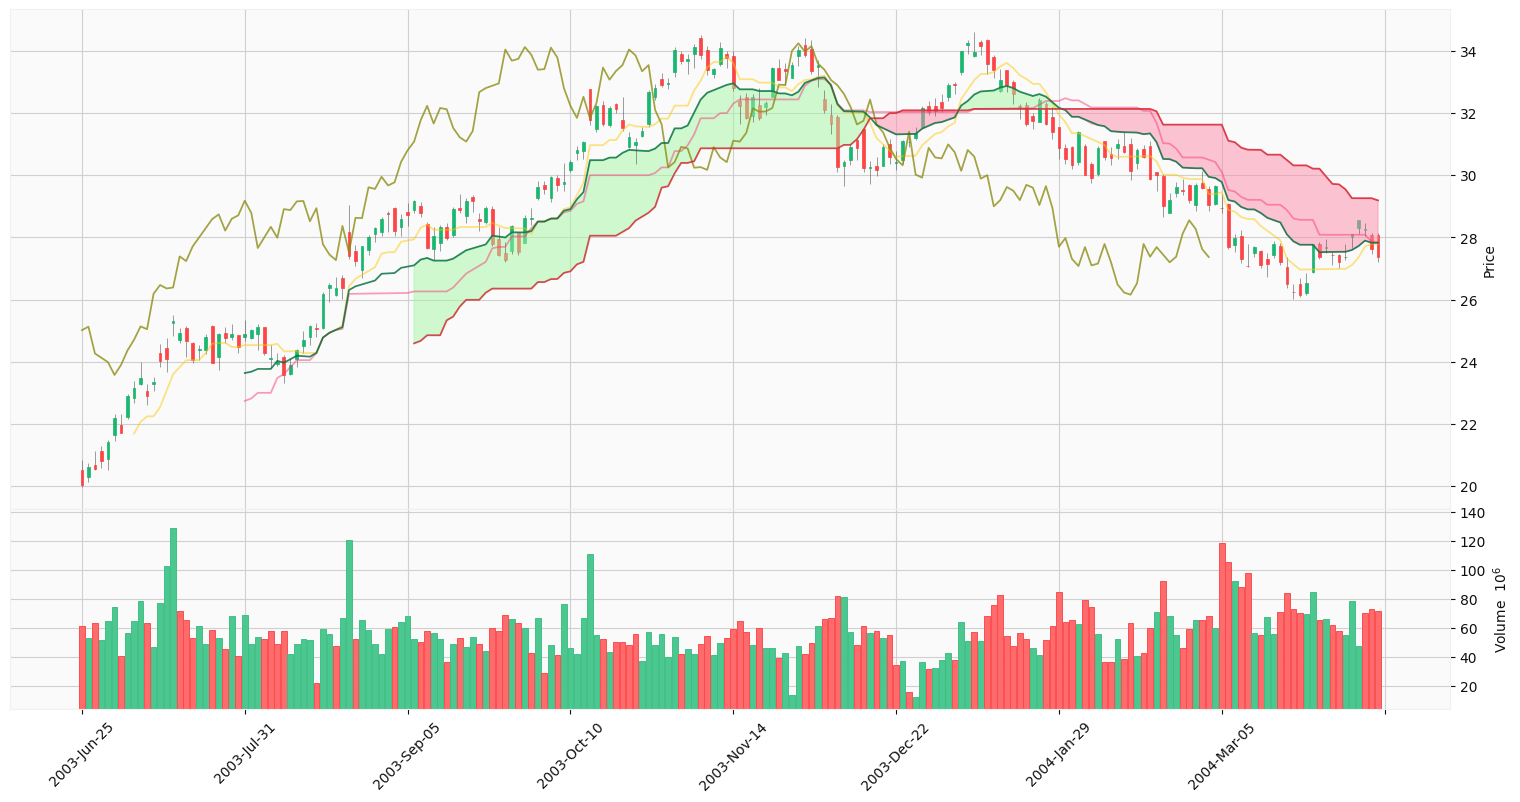

In [7]:
mpf.plot(
    df,
    volume=True,
    type="candle", 
    fill_between = [ichimoko_fill_up,ichimoko_fill_down],
    style="yahoo",
    addplot=ic,
    figsize=(20,10)
)